In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

## Training and Validation Sets

In [2]:
CATS_TFRECORDS = '../tfrecords/train/cats.tfrecords'
DOGS_TFRECORDS = '../tfrecords/train/dogs.tfrecords'
FILESNAMES = [CATS_TFRECORDS] # [DOGS_TFRECORDS]
TARGET_DIM = 128

CAT_LABEL = 0
DOG_LABEL = 1

In [3]:
def _parser(protobuf):
    # define the features we are extracting and previously specified
    features = {
        'label': tf.FixedLenFeature([], tf.int64, default_value=0),
        'image': tf.FixedLenFeature([], tf.string, default_value="")
    }
    
    parsed_features = tf.parse_single_example(protobuf, features)
    image = tf.decode_raw(parsed_features["image"], tf.float64)
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [TARGET_DIM, TARGET_DIM, 3])
    label = tf.cast(parsed_features["label"], tf.int32)
    
    return image, label

image label is cat


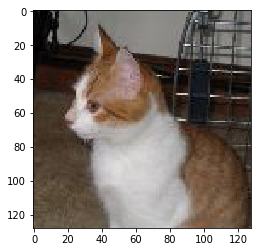

In [5]:
dataset = tf.data.TFRecordDataset(FILESNAMES)
dataset = dataset.map(_parser)

batched_dataset = dataset.batch(1)
iterator = batched_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

with tf.Session() as sess:
    val = sess.run(next_element)
    image = val[0][0]
    # image = np.multiply(image, 255.) 
    # image = image.astype(np.uint8)
    label = 'cat' if val[1][0] == 0 else 'dog'
    
    plt.imshow(image)
    print(f"image label is {label}")

## Test Set

In [3]:
CATS_TFRECORDS = '../tfrecords/test/cats.tfrecords'
DOGS_TFRECORDS = '../tfrecords/test/dogs.tfrecords'
FILESNAMES = [CATS_TFRECORDS] # [DOGS_TFRECORDS]
TARGET_DIM = 128

CAT_LABEL = 0
DOG_LABEL = 1

In [12]:
def _test_parser(protobuf):
    # define the features we are extracting and previously specified
    features = {
        'filename': tf.FixedLenFeature([], tf.string, default_value=""),
        'image': tf.FixedLenFeature([], tf.string, default_value="")
    }
    
    parsed_features = tf.parse_single_example(protobuf, features)
    image = tf.decode_raw(parsed_features["image"], tf.float64)
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [TARGET_DIM, TARGET_DIM, 3])
    # label = tf.compat.as_text(parsed_features["filename"], encoding='utf-8')
    filename = parsed_features["filename"]
    
    return image, filename

image filename is dataset/sample_resized/test/cats/cat.1577.jpg


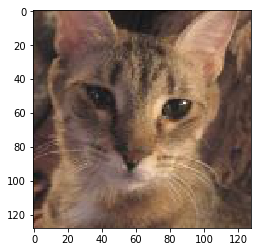

In [14]:
dataset = tf.data.TFRecordDataset(FILESNAMES)
dataset = dataset.map(_test_parser)

batched_dataset = dataset.batch(1)
iterator = batched_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

with tf.Session() as sess:
    val = sess.run(next_element)
    image = val[0][0]
    filename = val[1][0]
    filename = filename.decode('utf-8')
    
    plt.imshow(image)
    print(f"image filename is {filename}")